# Oklahoma City House Price Prediction

**Context :**

Iam Preparing for ML Intervews and i thought best way to practice is Doing the projects

#### Importing Libraries

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
data = pd.read_csv(r"M:\ACT_Prj\MLR\oklahoma_housing.csv")

C:\Users\Vasanth\AppData\Local\Temp\ipykernel_1700\4096508076.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"M:\ACT_Prj\MLR\oklahoma_housing.csv")


**Features**

* id: Unique identifier for each house/property.
* bedrooms: Number of bedrooms in the house.
* bathrooms: Number of bathrooms in the house (including fractional bathrooms).
* sqft_living: Total interior living space area in square feet.
* sqft_lot: Total lot size area in square feet.
* floors: Number of floors in the house.
* waterfront: Binary indicator if the property has a waterfront view (1=yes, 0=no).
* view: Rating of the quality of the view from the property (0–4 scale).
* condition: Condition rating of the house (1–5 scale).
* grade: Overall construction and design quality grade (1–13 scale).
* sqft_above: Square footage of the house excluding basement area.
* sqft_basement: Square footage of the basement area.
* yr_built: Year when the house was originally built.
* pincode: ZIP code / postal code 

**Target | Predictor**

* price: Sale price of the house (target variable).

In [80]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,pincode
0,7129300520,221900,3.0,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,73160.0
1,6414100192,538000,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,73199.0
2,5631500400,180000,2.0,1.0,770,10000,1.0,0,0,3,6,770,0,1933,73107.0
3,2487200875,604000,4.0,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,73130.0
4,1954400510,510000,3.0,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,73160.0


In [81]:
data.describe()

,pincode
count,97028.000000
mean,73141.372923
std,31.082416
min,73102.000000
25%,73114.000000
50%,73132.000000
75%,73169.000000
max,73199.000000


**Note :**

* I see the Pincode was only NUmerical column by type as it ends with ".0" and rest if visual numericals as Strings
* We need to Convert rest to numerics

In [82]:
for col in data.columns:
    if data[col].dtype in ['float64', 'int64']:
        data[col] = data[col].fillna(0).round().astype(int)

    elif data[col].dtype == 'object':
        try:
            data[col] = pd.to_numeric(data[col].replace('[\$,]', '', regex=True), errors='coerce')
            data[col] = data[col].fillna(0).round().astype(int)
        except Exception as e:
            print(f"Couldn't convert column '{col}' to numeric: {e}")


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Vasanth\AppData\Local\Temp\ipykernel_1700\1396840306.py:7: SyntaxWarning: invalid escape sequence '\$'
  data[col] = pd.to_numeric(data[col].replace('[\$,]', '', regex=True), errors='coerce')


In [83]:
data.dtypes

id               int64
price            int64
bedrooms         int64
bathrooms        int64
sqft_living      int64
sqft_lot         int64
floors           int64
waterfront       int64
view             int64
condition        int64
grade            int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
pincode          int64
dtype: object

In [84]:
print(data.nunique())


id               51182
price            48660
bedrooms            13
bathrooms            9
sqft_living       5578
sqft_lot         49544
floors               5
waterfront           2
view                 5
condition            6
grade               14
sqft_above        5482
sqft_basement     2049
yr_built           117
pincode             48
dtype: int64


In [85]:
data.count()

id               100000
price            100000
bedrooms         100000
bathrooms        100000
sqft_living      100000
sqft_lot         100000
floors           100000
waterfront       100000
view             100000
condition        100000
grade            100000
sqft_above       100000
sqft_basement    100000
yr_built         100000
pincode          100000
dtype: int64

#### ID

In [86]:
data['id']

0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
99995             0
99996    9900020442
99997    9900020443
99998    9900020444
99999    9900020445
Name: id, Length: 100000, dtype: int64

In [87]:
unique_count = data['id'].nunique()

total_values_count = data['id'].count()

print((unique_count / total_values_count) * 100 )

51.182


* We only have 51% Unique ids 

#### Price

In [88]:
data['price']

0         221900
1         538000
2         180000
3         604000
4         510000
          ...   
99995          0
99996    1781286
99997    1203395
99998     966694
99999          0
Name: price, Length: 100000, dtype: int64

In [89]:
price_skewness = data['price'].skew()
print(f"Skewness of the 'price' column: {price_skewness}")


Skewness of the 'price' column: 1.0605389546010577


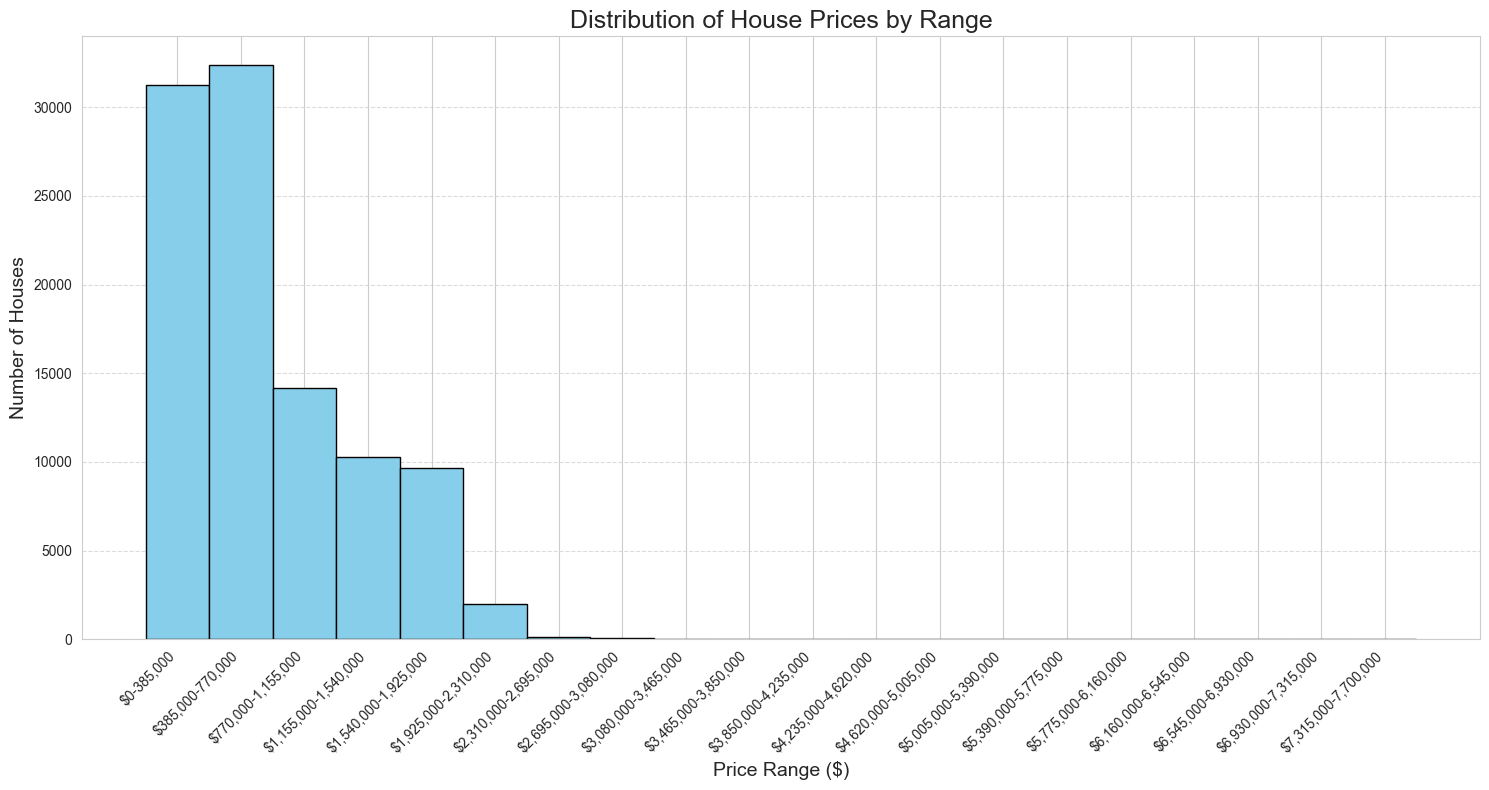

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

n_bins = 20
counts, bin_edges = np.histogram(data['price'], bins=n_bins)

bin_labels = [f"${int(bin_edges[i]):,}-{int(bin_edges[i+1]):,}" for i in range(n_bins)]

plt.figure(figsize=(15, 8))
plt.bar(np.arange(n_bins), counts, width=1, edgecolor='black', color='skyblue')

plt.xticks(np.arange(n_bins), bin_labels, rotation=45, ha='right')

plt.title('Distribution of House Prices by Range', fontsize=18)
plt.xlabel('Price Range ($)', fontsize=14)
plt.ylabel('Number of Houses', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Note :**

* I wanna see realtionship bewtween main varaibles and price to see how it is

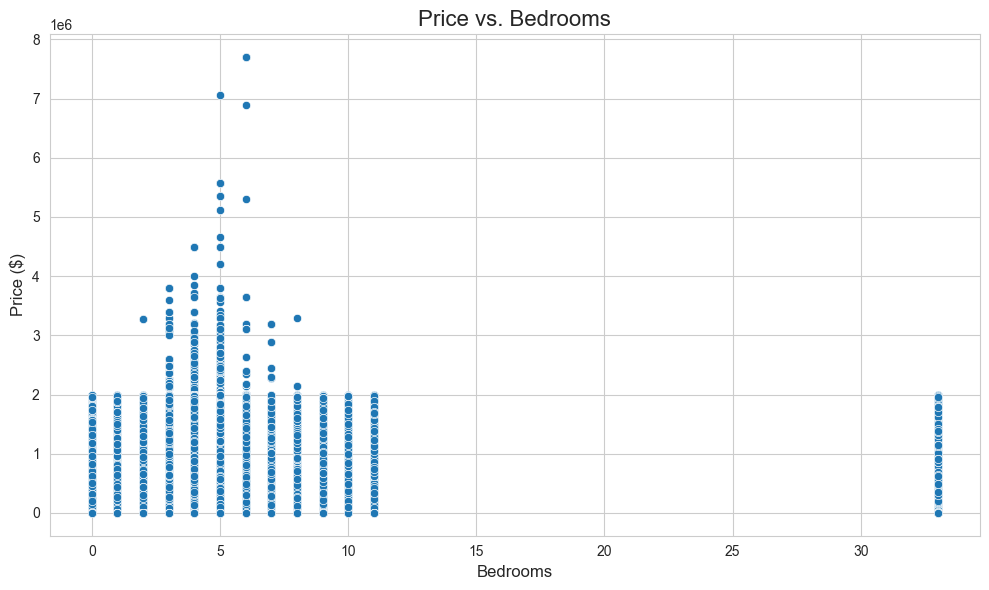

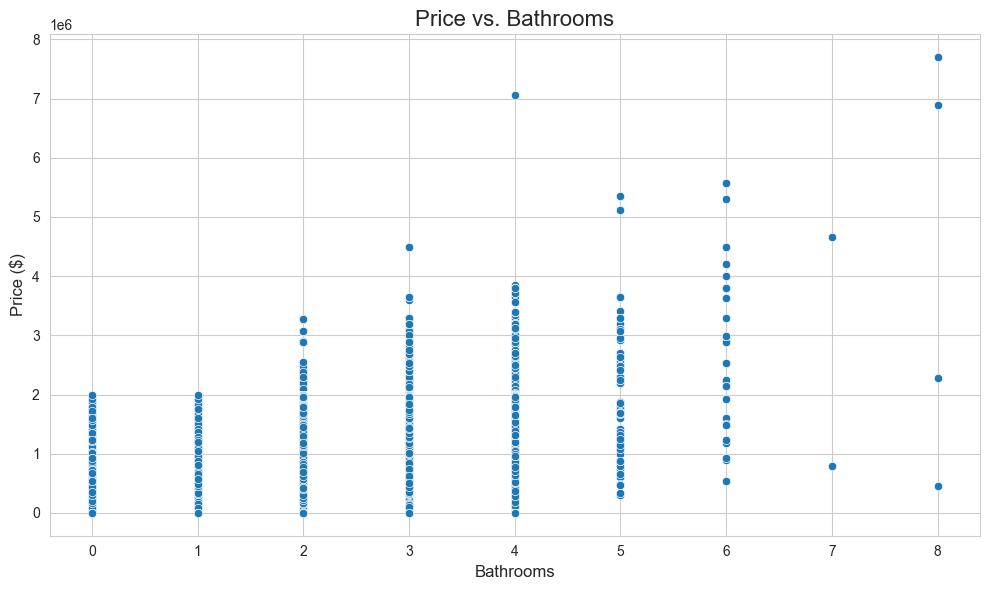

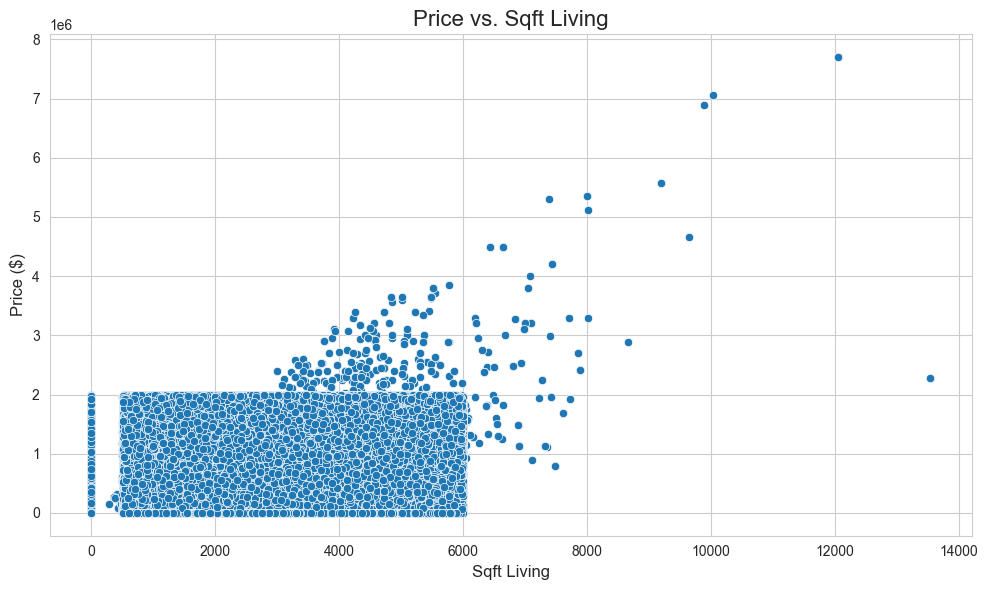

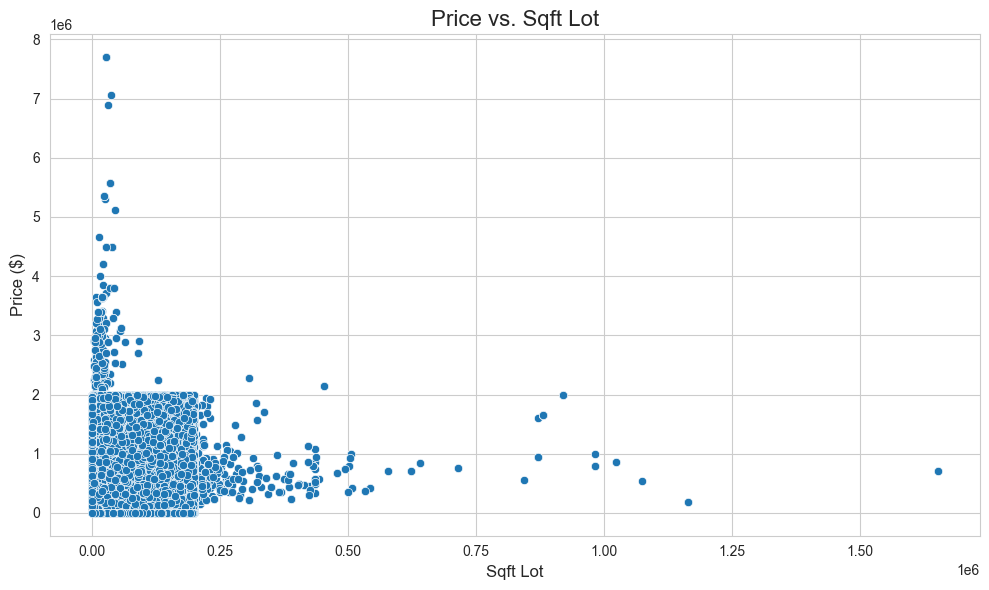

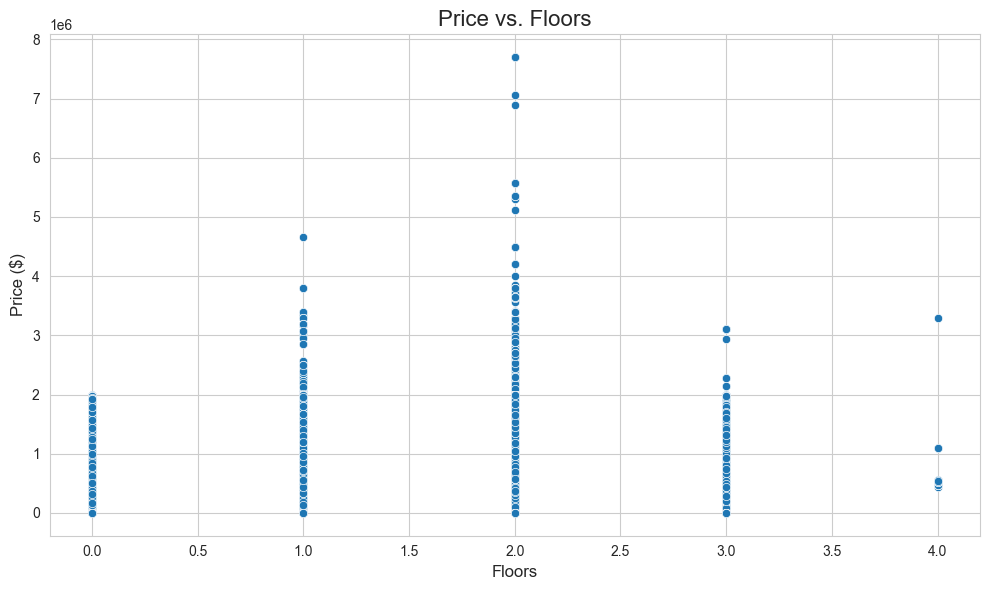

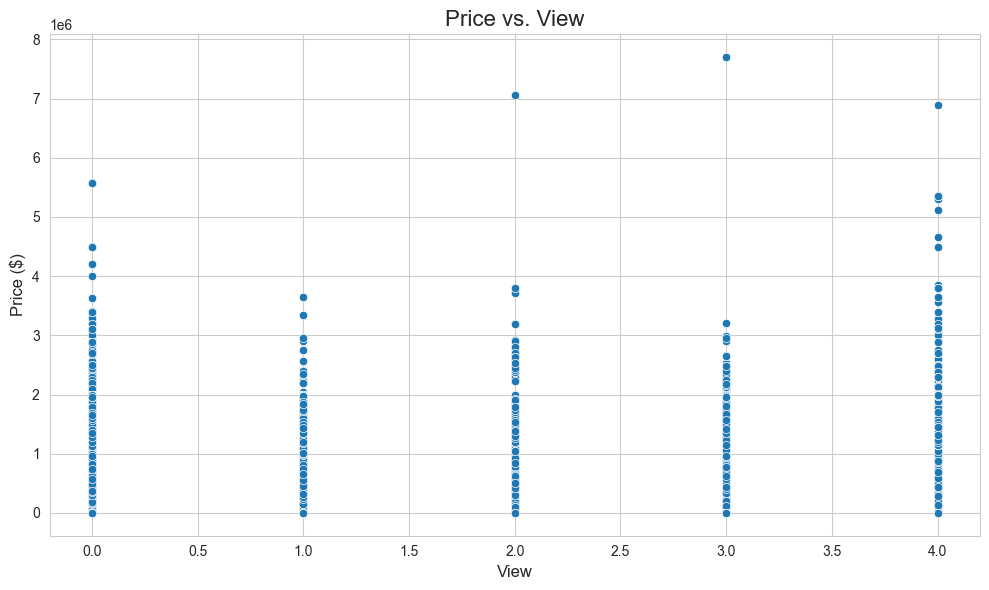

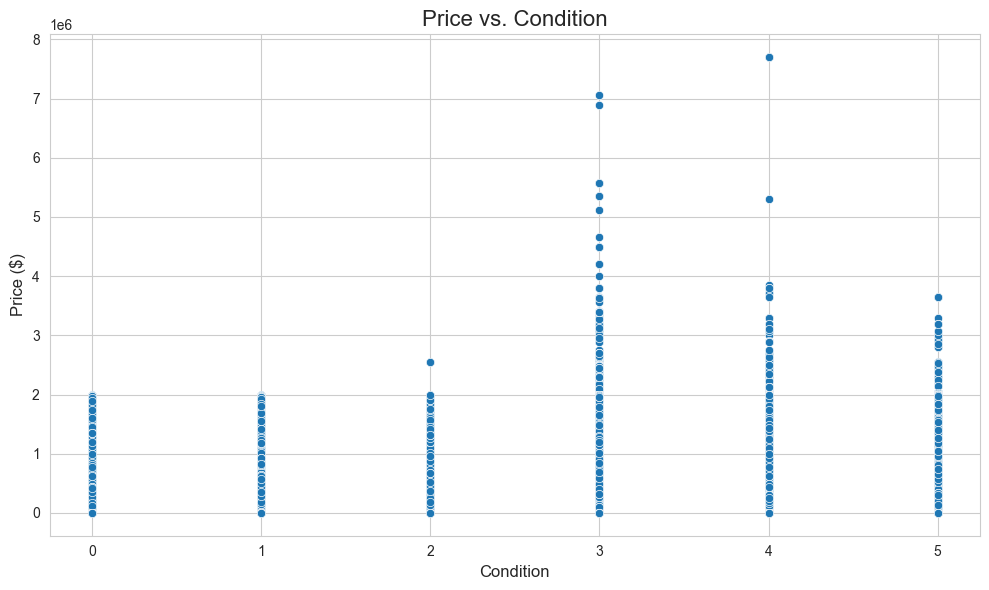

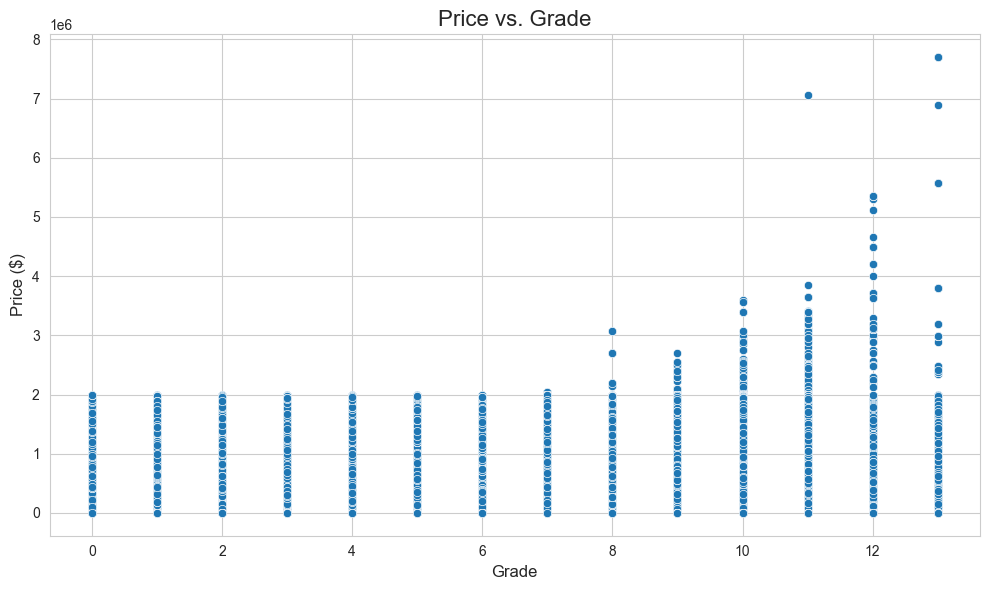

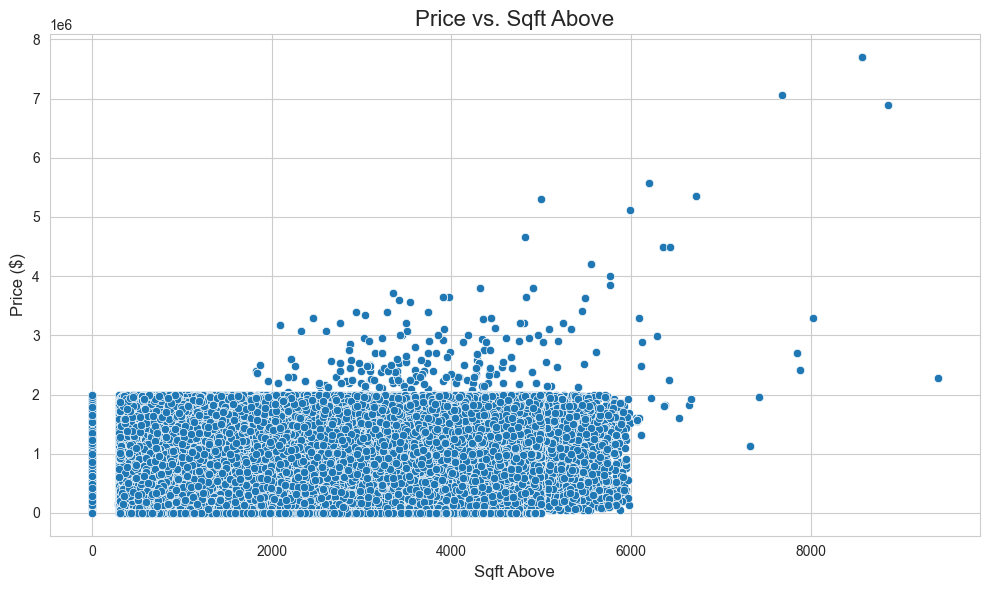

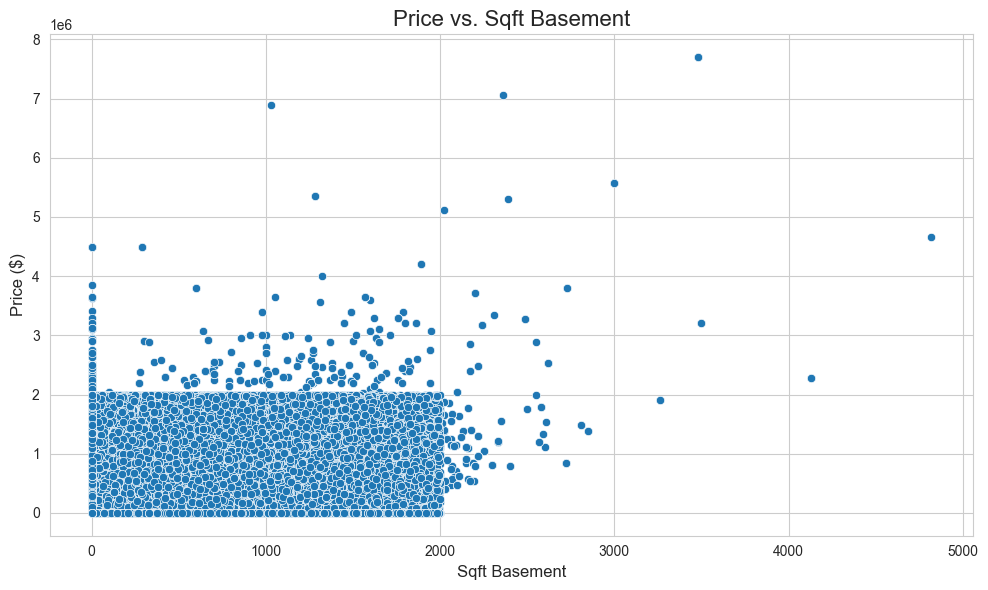

In [91]:
main_features_scatter = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement']

for feature in main_features_scatter:
    data[feature] = pd.to_numeric(data[feature], errors='coerce').fillna(0).astype(int)

for feature in main_features_scatter:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='price', data=data)
    plt.title(f'Price vs. {feature.replace("_", " ").title()}', fontsize=16)
    plt.xlabel(feature.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Price ($)', fontsize=12)
    plt.tight_layout()
    plt.savefig(f'scatter_{feature}_vs_price.png')
    plt.show()


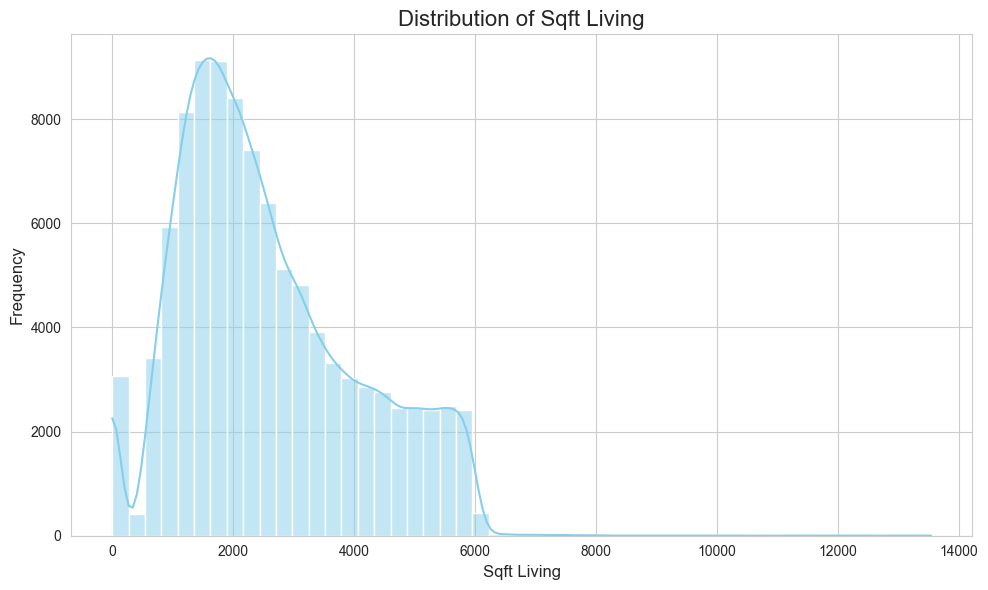

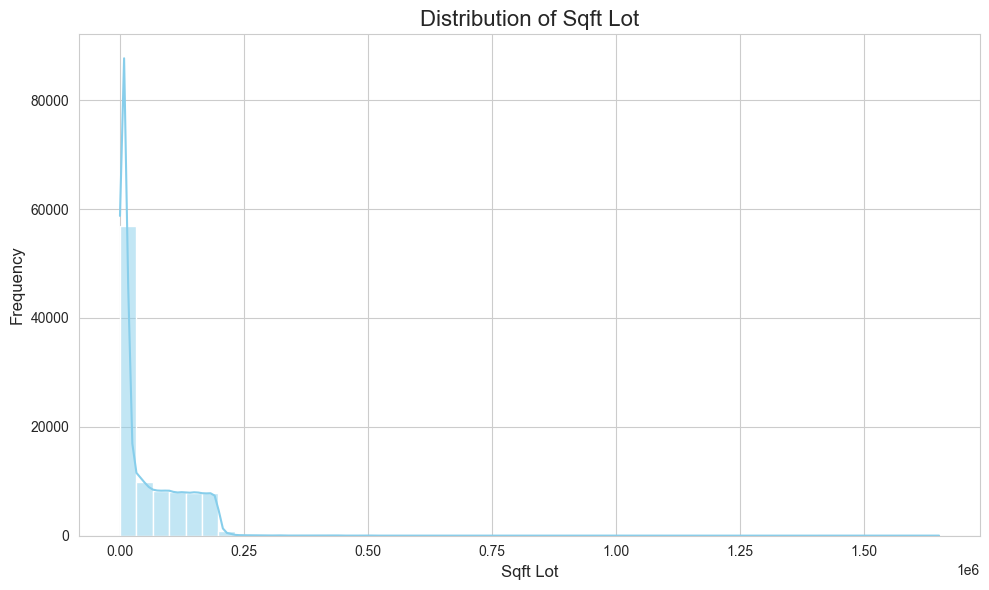

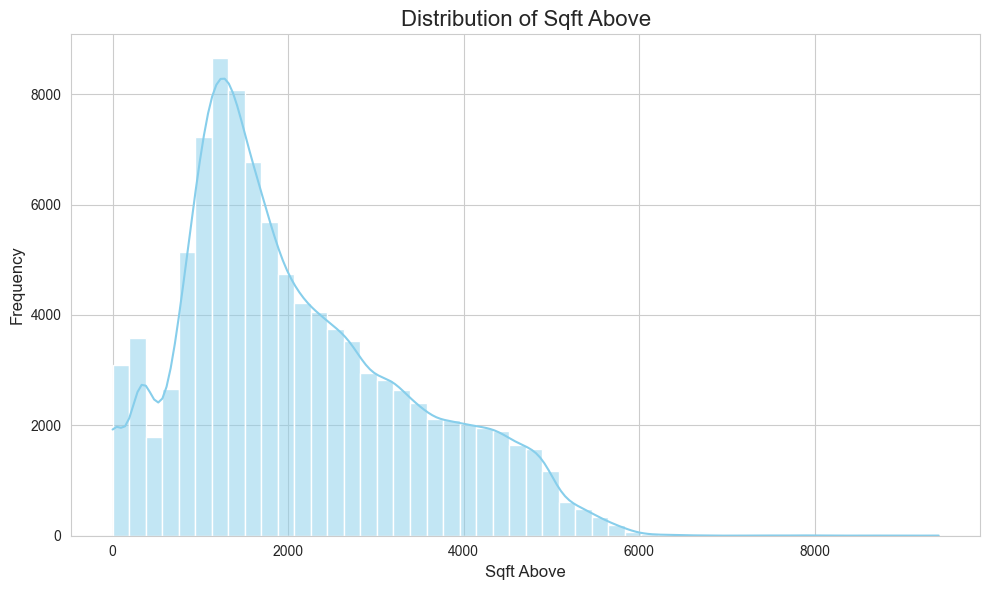

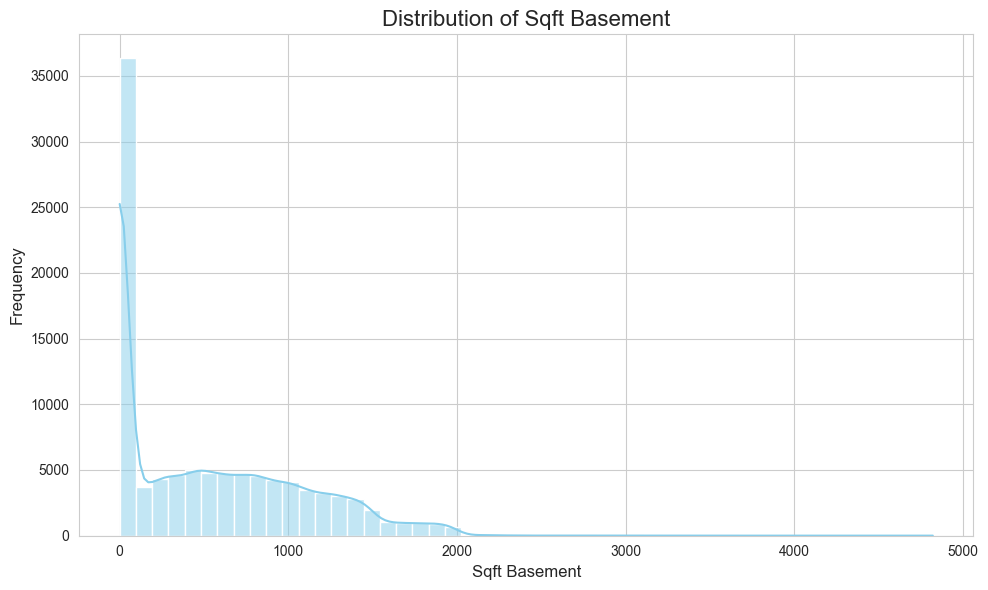

In [92]:
continuous_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

# Create and save individual distribution plots
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], bins=50, kde=True, color='skyblue')
    
    # Add a title and labels
    plt.title(f'Distribution of {feature.replace("_", " ").title()}', fontsize=16)
    plt.xlabel(feature.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    plt.tight_layout()
    plt.savefig(f'distribution_{feature}.png')
    plt.show()

Skewness of the log-transformed 'price' column: -3.8496000573618097


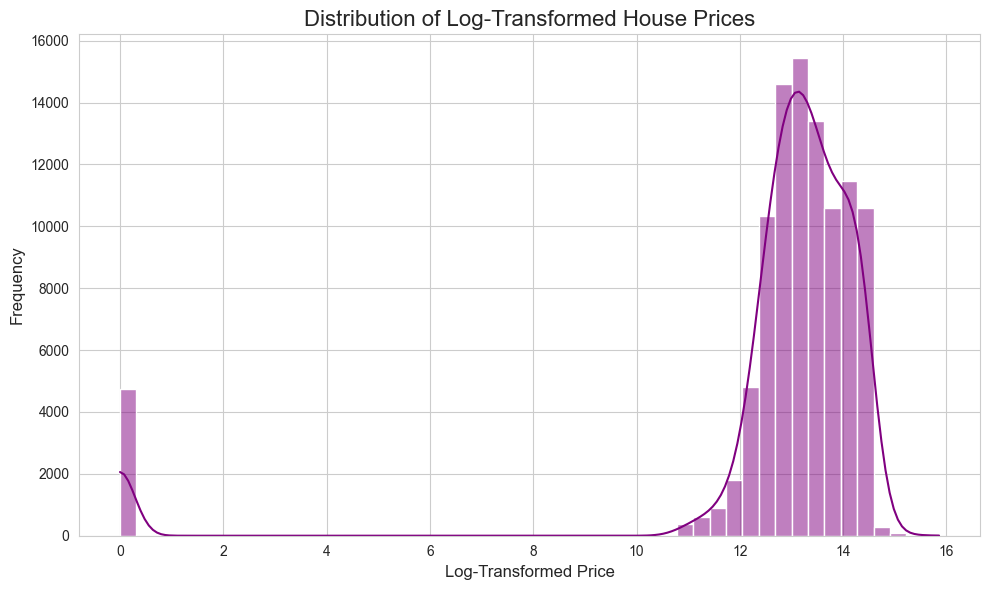

In [93]:
data['log_price'] = np.log1p(data['price'])

# See the new skewness score
log_price_skewness = data['log_price'].skew()
print(f"Skewness of the log-transformed 'price' column: {log_price_skewness}")

# Plot the distribution of the transformed price
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], bins=50, kde=True, color='purple')

# Add a title and labels
plt.title('Distribution of Log-Transformed House Prices', fontsize=16)
plt.xlabel('Log-Transformed Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


**Note :**
* I tried applying Log Transformation on price to reduce skewness but it turned to become aggress less skewed
* the price data i have is more right skewed means i have tail part more
* means - i have houses which cost id higher less and medium cost houses a lot
* because i still have high cist houses on data , theres no bins on histogram only but a line

In [94]:
from scipy.stats import boxcox


numeric_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                'floors', 'waterfront', 'view', 'condition', 'grade',
                'sqft_above', 'sqft_basement']

# Convert columns to numeric, coercing errors and filling NaNs
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    # Fill NaNs with a reasonable value, like the mean or median, before the next step.
    # For now, let's fill with 0 to avoid errors.
    data[col] = data[col].fillna(0)

# The Box-Cox transformation requires positive data. Add a small constant to ensure all values are > 0.
data['price_positive'] = data['price'] + 1


# --- Step 2: Apply Box-Cox Transformation ---
transformed_price, lam = boxcox(data['price_positive'])
data['boxcox_price'] = transformed_price

# Print the optimal lambda value used by the transformation
print(f"Optimal lambda value for Box-Cox transformation: {lam:.4f}")

Optimal lambda value for Box-Cox transformation: 0.4224


In [95]:
data['sqrt_price'] = np.sqrt(data['price'])

# See the new skewness score
sqrt_price_skewness = data['sqrt_price'].skew()
print(f"Skewness of the square-root transformed 'price' column: {sqrt_price_skewness:.4f}")

Skewness of the square-root transformed 'price' column: -0.0848


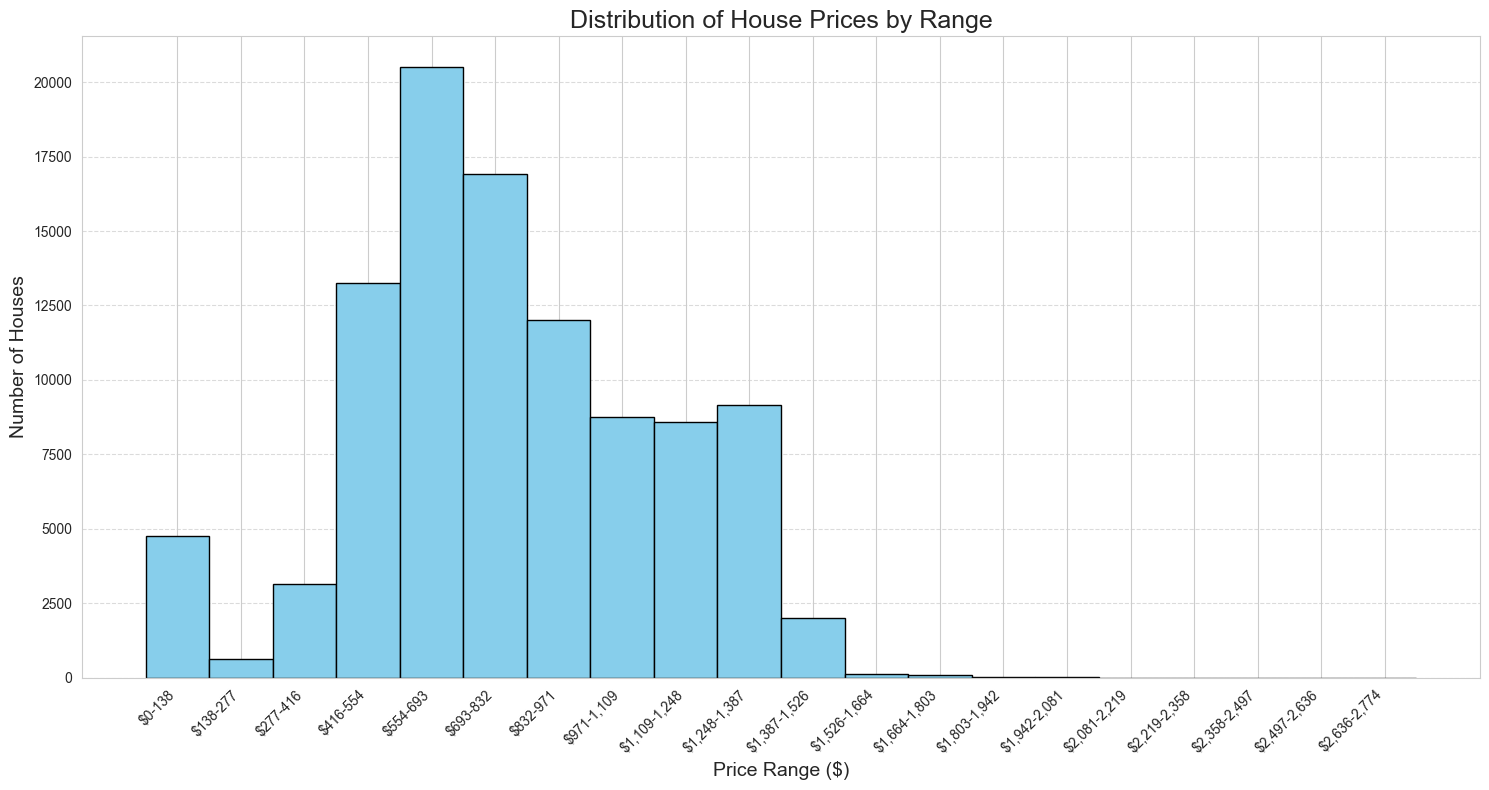

In [96]:
n_bins = 20
counts, bin_edges = np.histogram(data['sqrt_price'], bins=n_bins)

bin_labels = [f"${int(bin_edges[i]):,}-{int(bin_edges[i+1]):,}" for i in range(n_bins)]

plt.figure(figsize=(15, 8))
plt.bar(np.arange(n_bins), counts, width=1, edgecolor='black', color='skyblue')

plt.xticks(np.arange(n_bins), bin_labels, rotation=45, ha='right')

plt.title('Distribution of House Prices by Range', fontsize=18)
plt.xlabel('Price Range ($)', fontsize=14)
plt.ylabel('Number of Houses', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [97]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,pincode,log_price,price_positive,boxcox_price,sqrt_price
0,7129300520,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,73160,12.309987,221901,426.717145,471.062629
1,6414100192,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,73199,13.195616,538001,621.385149,733.484833
2,5631500400,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,73107,12.100718,180001,390.415251,424.264069
3,2487200875,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,73130,13.311331,604001,652.631296,777.174369
4,1954400510,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,73160,13.142168,510001,607.460512,714.142843


### Approach

* First i checked the data skewness and found right skewed - score above 1
* i applied log transformation but i turned my data to left skewed wiht score -3
* checked with box cox transformation and got score - 0.4
* if boxcox i can apply root transforamtion , so i chose root 
* after applying root -  i got skewnedd score as -0.08 which is almost symmentric


In [98]:
final_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                 'floors', 'waterfront', 'view', 'condition', 'grade',
                 'sqft_above', 'sqft_basement', 'sqrt_price']

# Create a new DataFrame with just the selected columns
final_data = data[final_columns]

# Remove any rows with missing values to ensure a clean, aligned dataset
final_data.dropna(inplace=True)

# Print the shape of the new DataFrame to see how many rows are ready
print(f"Original data shape: {data.shape}")
print(f"Final data shape for modeling: {final_data.shape}\n")

final_data.head()

Original data shape: (100000, 19)
Final data shape for modeling: (100000, 12)



C:\Users\Vasanth\AppData\Local\Temp\ipykernel_1700\1575193110.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.dropna(inplace=True)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqrt_price
0,3,1,1180,5650,1,0,0,3,7,1180,0,471.062629
1,3,2,2570,7242,2,0,0,3,7,2170,400,733.484833
2,2,1,770,10000,1,0,0,3,6,770,0,424.264069
3,4,3,1960,5000,1,0,0,5,7,1050,910,777.174369
4,3,2,1680,8080,1,0,0,3,8,1680,0,714.142843


In [99]:
final_data['has_basement'] = np.where(final_data['sqft_basement'] > 0, 1, 0)

final_data.head()

C:\Users\Vasanth\AppData\Local\Temp\ipykernel_1700\2479560414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['has_basement'] = np.where(final_data['sqft_basement'] > 0, 1, 0)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqrt_price,has_basement
0,3,1,1180,5650,1,0,0,3,7,1180,0,471.062629,0
1,3,2,2570,7242,2,0,0,3,7,2170,400,733.484833,1
2,2,1,770,10000,1,0,0,3,6,770,0,424.264069,0
3,4,3,1960,5000,1,0,0,5,7,1050,910,777.174369,1
4,3,2,1680,8080,1,0,0,3,8,1680,0,714.142843,0


In [100]:
final_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqrt_price,has_basement
0,3,1,1180,5650,1,0,0,3,7,1180,0,471.062629,0
1,3,2,2570,7242,2,0,0,3,7,2170,400,733.484833,1
2,2,1,770,10000,1,0,0,3,6,770,0,424.264069,0
3,4,3,1960,5000,1,0,0,5,7,1050,910,777.174369,1
4,3,2,1680,8080,1,0,0,3,8,1680,0,714.142843,0
